In this assignment, students will be using the K-nearest neighbors
algorithm to predict how many points NBA players scored in the 2013-2014
season.

In [91]:
#importiung the necessary libraries
import numpy as np
import pandas as pd

In [92]:
from sklearn.neighbors import KNeighborsClassifier
#Let's start with importing necessary libraries
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [195]:
data=pd.read_csv('C:/DataSETs/nba_2013.csv')

In [153]:
data.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [196]:
data.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

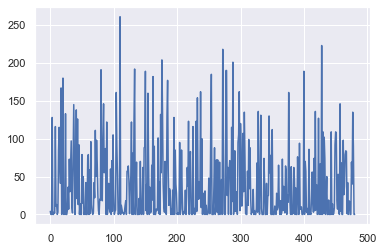

In [197]:
plt.plot(data.x3p)

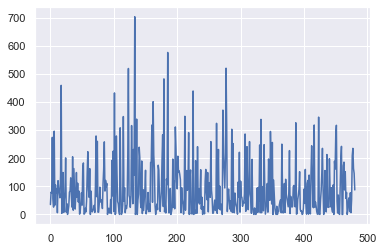

In [198]:
plt.plot(data.ft)

In [199]:
data.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [200]:
data1=data[['age', 'g', 'gs', 'mp', 'fg', 'fga',
        'x3p', 'x3pa', 'x2p', 'x2pa', 'ft',
       'fta', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']]
#removing unnecessary columns.

In [201]:
data1.isnull().sum()

age     0
g       0
gs      0
mp      0
fg      0
fga     0
x3p     0
x3pa    0
x2p     0
x2pa    0
ft      0
fta     0
orb     0
drb     0
trb     0
ast     0
stl     0
blk     0
tov     0
pf      0
dtype: int64

In [202]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(data1)

In [203]:
y=data.pts

In [204]:
x_train,x_test,y_train,y_test=train_test_split(data1,y,test_size=0.20,random_state=355)

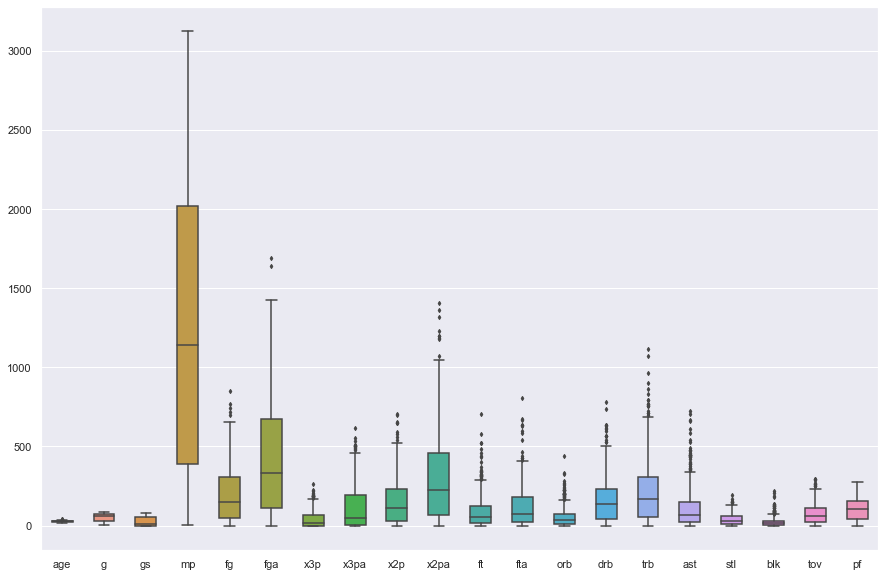

In [206]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data1, width= 0.5,ax=ax,  fliersize=3)

In [184]:
data1.isnull().sum()

age     0
g       0
gs      0
mp      0
fg      0
fga     0
x3p     0
x3pa    0
x2p     0
x2pa    0
ft      0
fta     0
orb     0
drb     0
trb     0
ast     0
stl     0
blk     0
tov     0
pf      0
dtype: int64

In [207]:
# let's fit the data into kNN model and see how well it performs:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [208]:
y_pred = knn.predict(x_test)

In [209]:
knn.score(x_train,y_train)

0.15625

In [210]:
param_grid = { 'algorithm' : ['auto','ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [212]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [213]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits
[CV] algorithm=auto, leaf_size=18, n_neighbors=3 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=3, score=0.013, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=3 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=3, score=0.065, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=3 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=3, score=0.026, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=3 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=3, score=0.039, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=3 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=3, score=0.026, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=5 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=5, score=0.026, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neigh

C:\Users\Amol\anaconda34\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] algorithm=auto, leaf_size=18, n_neighbors=5 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=5, score=0.013, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=5 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=5, score=0.013, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=5 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=5, score=0.013, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=7 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=7, score=0.026, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=7 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=7, score=0.039, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=7 .....................
[CV]  algorithm=auto, leaf_size=18, n_neighbors=7, score=0.026, total=   0.0s
[CV] algorithm=auto, leaf_size=18, n_neighbors=7 .....................
[CV]  algorithm=auto, leaf_size=18,

[Parallel(n_jobs=1)]: Done 1120 out of 1120 | elapsed:   18.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [215]:
gridsearch.best_params_


{'algorithm': 'auto', 'leaf_size': 18, 'n_neighbors': 3}

In [217]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn = KNeighborsClassifier(algorithm = 'auto', leaf_size =18, n_neighbors =3)

In [218]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=18, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [219]:
knn.score(x_train,y_train)

0.28125